## Mock data to train classifiers or check how our pipeline works ##

Options:
- generate manually
- generate with MNE
- download someones dataset (I found different csv and mat sets but I do not understand how exactly to use them)

In [8]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy.io
import mne


### Self simulation ###

In [5]:
sampling_rate = 200  # Hz
signal_duration = 5  # seconds

p300_duration = 0.2  # seconds (Should be around roughly 250 to 500 ms)
p300_amplitude = 1.0
p300_latency = 1.0  # seconds
p300_frequency = 10  # Hz

#time axis of the signal
t = np.arange(0, signal_duration, 1 / sampling_rate)

#creating a baseline
baseline_signal = np.random.normal(0, 0.2, len(t))

noise_amplitude = 0.1  # Amplitude of the noise

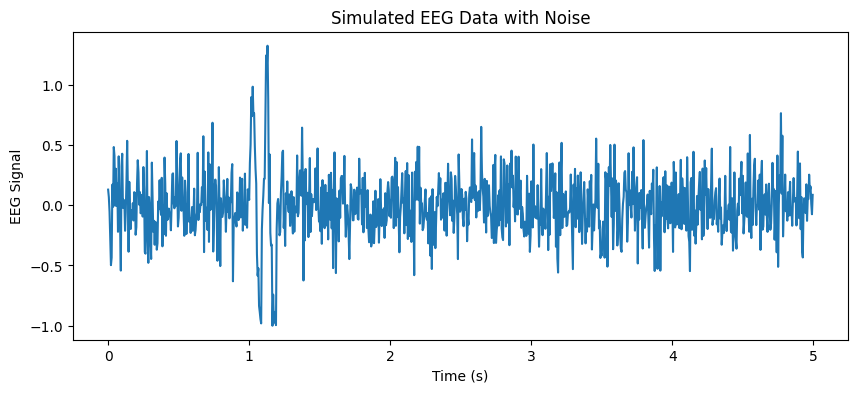

In [6]:
# generate P300 component

p300_start = int(p300_latency * sampling_rate)
p300_end = p300_start + int(p300_duration * sampling_rate)
p300_signal = np.zeros(len(t))
p300_signal[p300_start:p300_end] = p300_amplitude * np.sin(2 * np.pi * p300_frequency * t[p300_start:p300_end])

# add it to the signal
eeg_signal = baseline_signal + p300_signal

noise = np.random.normal(0, noise_amplitude, len(t))
eeg_signal_with_noise = eeg_signal + noise

plt.figure(figsize=(10, 4))
plt.plot(t, eeg_signal_with_noise)
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal')
plt.title('Simulated EEG Data with Noise')
plt.show()








### Another option ###

Here I tried to use the data file from the database but it was .mat and I translated it to csv and don't know how to use it here.

In [4]:

# Load .mat file
mat_data = scipy.io.loadmat(r'C:\Users\April\Desktop\studieren\TUM\SS23\PBSM\Project\archive\P300S01.mat')

# Extract data from the loaded .mat file
# Assuming the variable you want to convert is named 'data'
data = mat_data['data']

# Convert the data to a numpy array if necessary
data = np.array(data)

# Define the CSV file path
csv_file_path = r'C:\Users\April\Desktop\studieren\TUM\SS23\PBSM\Project\try.csv'

# Write the data to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)
    
print(f'CSV file saved successfully at {csv_file_path}.')


CSV file saved successfully at C:\Users\April\Desktop\studieren\TUM\SS23\PBSM\Project\try.csv.


In [ ]:
eeg_data = mat_data['eeg_data_variable_name']
eeg_data = np.array(eeg_data)

In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the DataFrame
print(df)


Empty DataFrame
Columns: [(array([[26.95640373, 11.73869324,  6.98503304, ...,  2.66381407,
        -3.04957318, -2.63618731],
       [29.94702721, 14.98267174, 10.02626705, ...,  5.16736984,
         1.30663943,  2.16391516],
       [33.09702683, 19.32771683, 13.60309792, ...,  8.05283546,
         8.53473663,  7.90571976],
       ...,
       [ 5.6236558 ,  0.53022534,  1.55959177, ..., -4.96036482,
         2.35364461, -8.1143961 ],
       [ 4.38928461,  1.46526659,  1.96254373, ..., -4.6057415 ,
         1.29674733, -7.18669939],
       [ 2.58838463,  0.79275906,  0.29564747, ..., -4.98137999,
        -4.04607677, -7.54975986]]), array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), array([[  7487,  17511,  27536,  37564,  47590,  57620,  67641,  77667,
         87690,  97715, 107740, 117764, 127790, 137813, 147840, 157867,
        167893, 1

### With MNE by chatGPT ###

Here I tried to use chatGPT to generate data with P300 elements

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


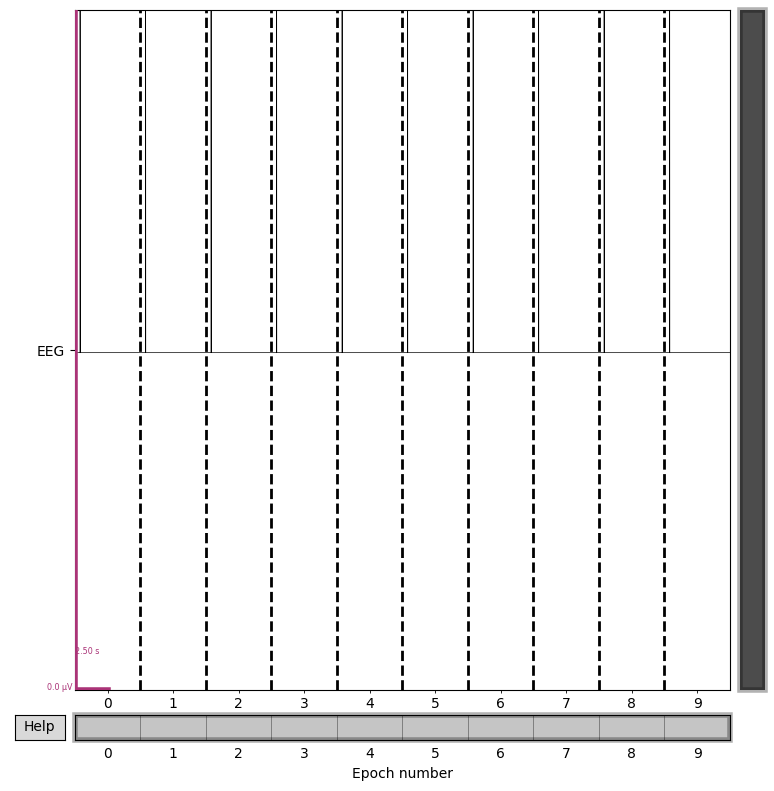

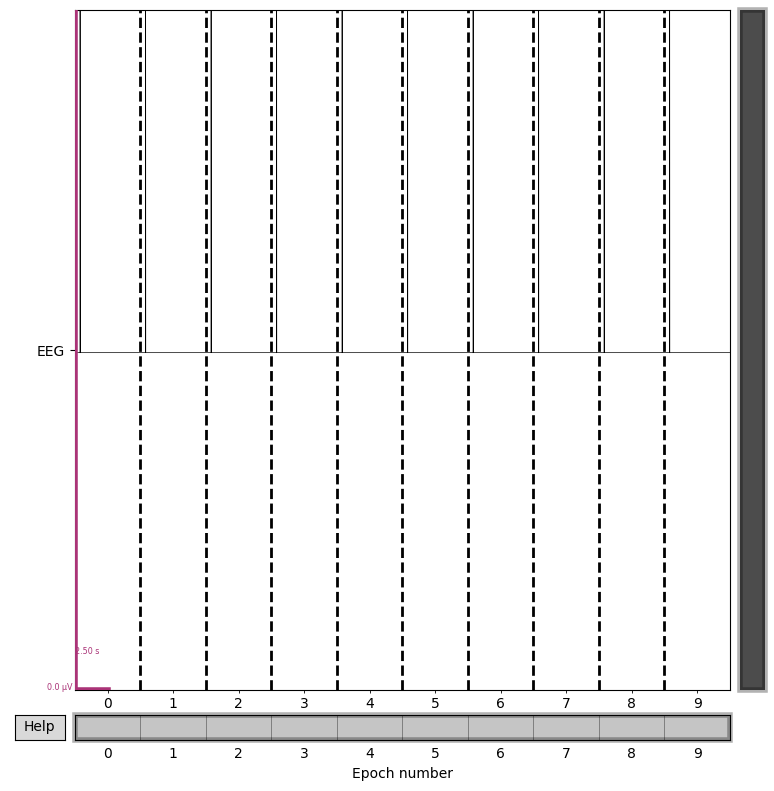

In [17]:
# mock meta data
n_channels = 32
sampling_freq = 200  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)

# sfreq = 250
duration = 5
n_epochs = 10  # Number of epochs to simulate

p300_duration = 0.2
p300_amplitude = 10.0
p300_latency = 0.3
p300_frequency = 10

info = mne.create_info(ch_names=['EEG'], sfreq=sfreq, ch_types=['eeg'])

times = np.arange(0, duration, 1 / sfreq)
p300_signal = np.zeros(len(times))

p300_peak_time = p300_latency + p300_duration / 2
p300_peak_index = int(p300_peak_time * sfreq)
p300_signal[p300_peak_index] = p300_amplitude

epochs_data = np.tile(p300_signal, (n_epochs, 1))  # Create multiple epochs by tiling the signal
epochs_data = np.expand_dims(epochs_data, axis=1)  # Reshape to (n_epochs, 1, n_samples)
epochs = mne.EpochsArray(data=epochs_data, info=info)

epochs.plot(scalings='auto', show=True)


### With MNE from the documentation ###

Here I looked at the MNE website and look at what they sugest 

In [13]:
# Create some dummy metadata
n_channels = 32
sampling_freq = 200  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 32 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 200.0 Hz
>


In [14]:
ch_names = ["Fp1", "Fp2", "Fz", "Cz", "Pz", "O1", "O2"]
ch_types = ["eeg"] * 7
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("standard_1020")

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, Fz, Cz, Pz, O1, O2
 chs: 7 EEG
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 200.0 Hz
>

Creating RawArray with float64 data, n_channels=2, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.


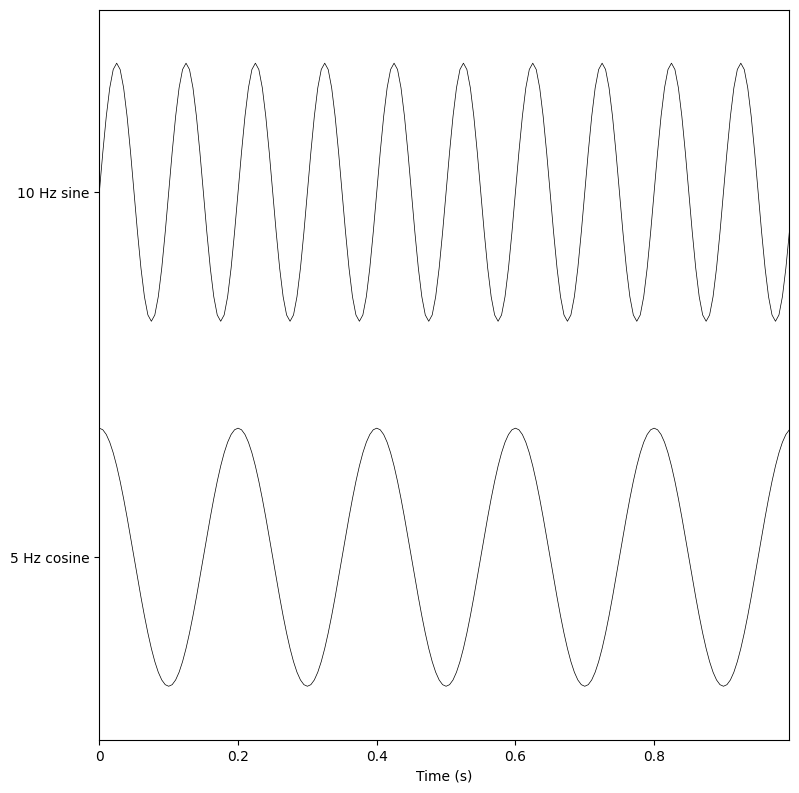

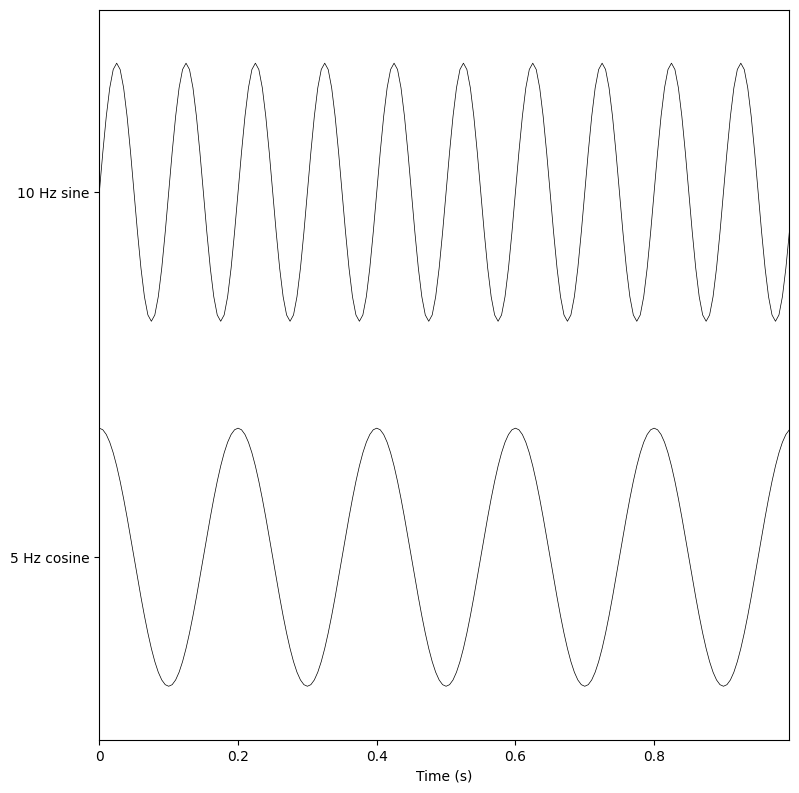

In [15]:
times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = np.sin(20 * np.pi * times)
cosine = np.cos(10 * np.pi * times)
data = np.array([sine, cosine])

info = mne.create_info(
    ch_names=["10 Hz sine", "5 Hz cosine"], ch_types=["misc"] * 2, sfreq=sampling_freq
)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=2, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


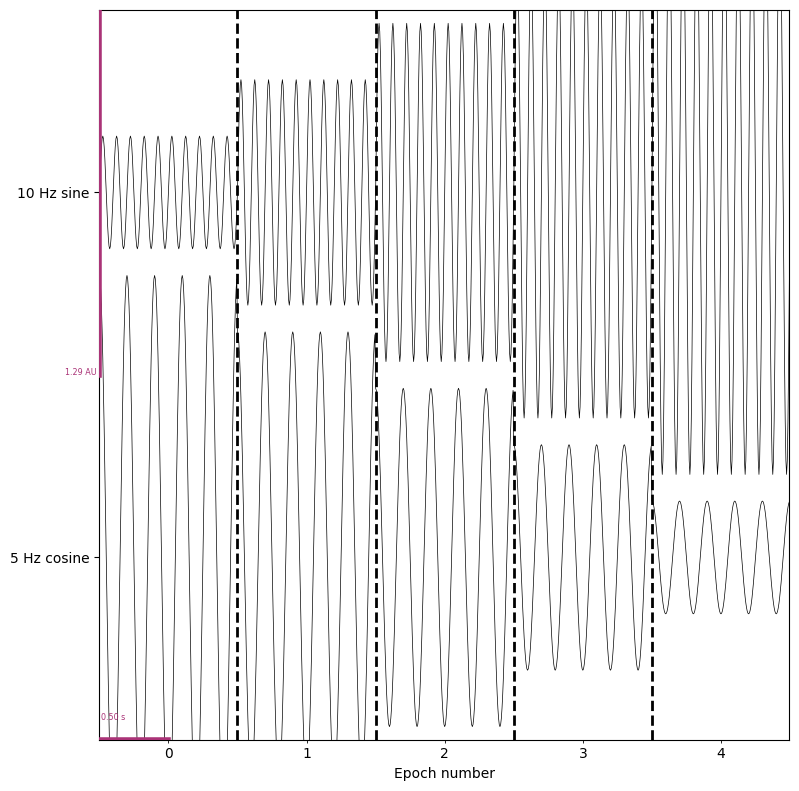

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


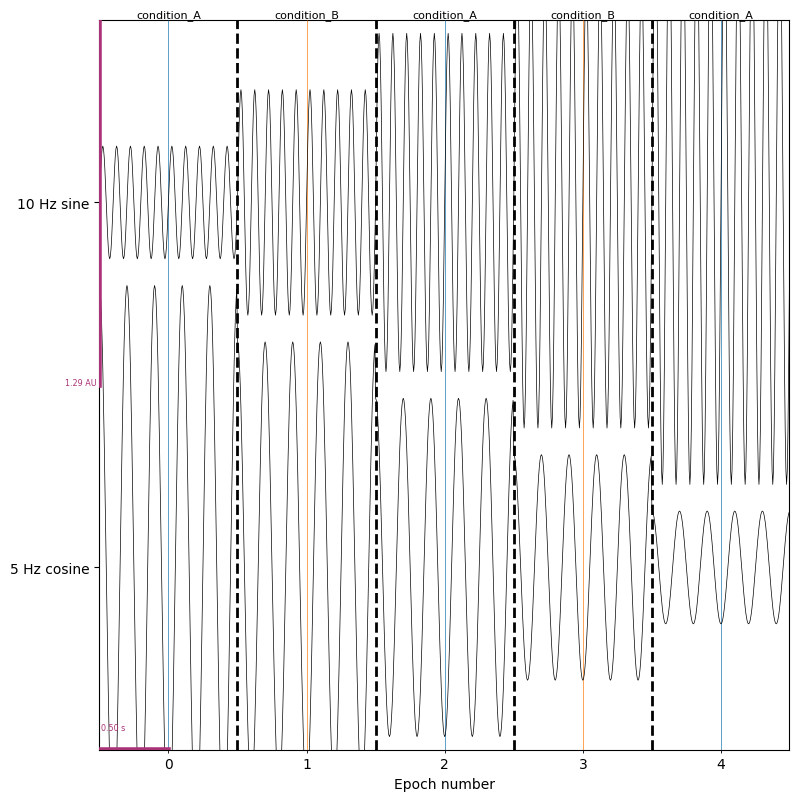

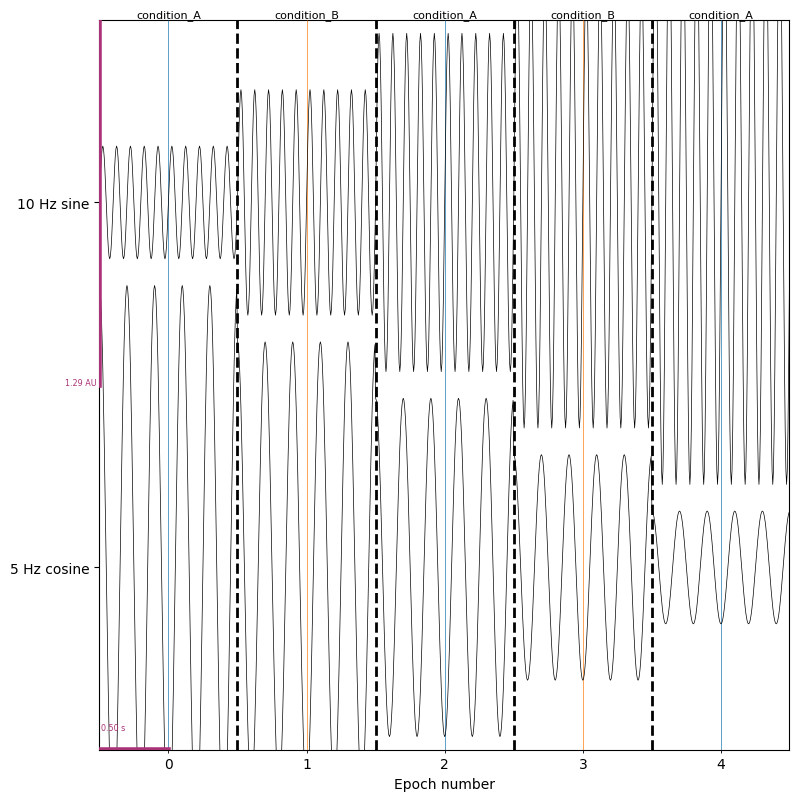

In [22]:
times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = np.sin(20 * np.pi * times)
cosine = np.cos(10 * np.pi * times)
data = np.array([sine, cosine])

info = mne.create_info(
    ch_names=["10 Hz sine", "5 Hz cosine"], ch_types=["misc"] * 2, sfreq=sampling_freq
)

simulated_raw = mne.io.RawArray(data, info)
# simulated_raw.plot(show_scrollbars=False, show_scalebars=False)
data = np.array(
    [
        [0.2 * sine, 1.0 * cosine],
        [0.4 * sine, 0.8 * cosine],
        [0.6 * sine, 0.6 * cosine],
        [0.8 * sine, 0.4 * cosine],
        [1.0 * sine, 0.2 * cosine],
    ]
)

simulated_epochs = mne.EpochsArray(data, info)
simulated_epochs.plot(picks="misc", show_scrollbars=False)

events = np.column_stack(
    (
        np.arange(0, 1000, sampling_freq),
        np.zeros(5, dtype=int),
        np.array([1, 2, 1, 2, 1]),
    )
)
event_dict = dict(condition_A=1, condition_B=2)
simulated_epochs = mne.EpochsArray(
    data, info, tmin=-0.5, events=events, event_id=event_dict
)
simulated_epochs.plot(
    picks="misc", show_scrollbars=False, events=events, event_id=event_dict
)

<Evoked | 'simulated' (average, N=5), -0.5 – 0.495 s, baseline off, 2 ch, ~10 kB>


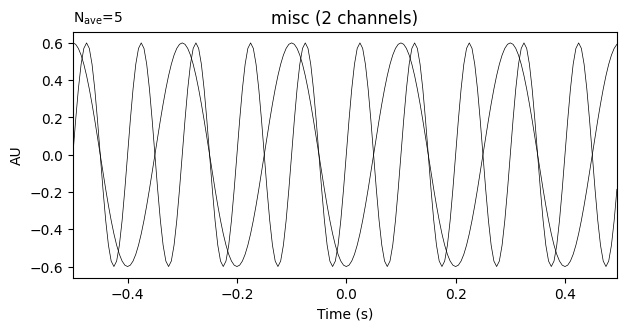

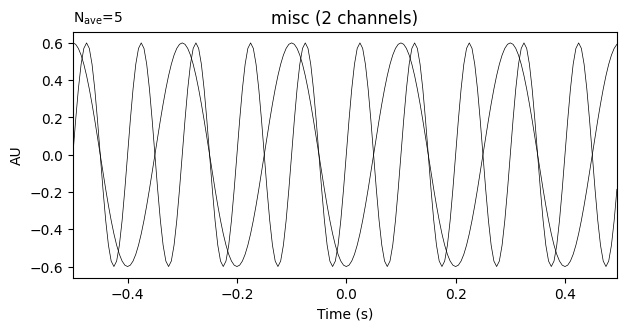

In [24]:
# Create the Evoked object
evoked_array = mne.EvokedArray(
    data.mean(axis=0), info, tmin=-0.5, nave=data.shape[0], comment="simulated"
)
print(evoked_array)
evoked_array.plot()

Effective window size : 0.640 (s)


c:\Users\April\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


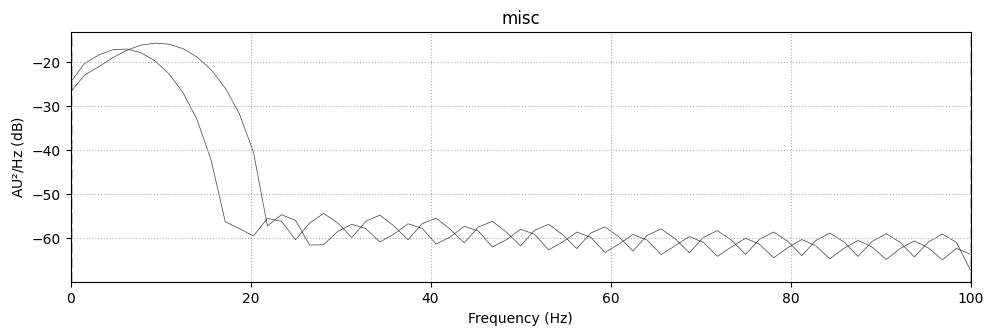

In [25]:
# compute power spectrum

psd, freqs = mne.time_frequency.psd_array_welch(
    data, info["sfreq"], n_fft=128, n_per_seg=32
)

psd_ave = psd.mean(0)

# map to `~mne.time_frequency.Spectrum` class and explore API


def spectrum_from_array(
    data: np.ndarray,  # spectral features
    freqs: np.ndarray,  # frequencies
    inst_info: mne.Info,  # the meta data of MNE instance
) -> mne.time_frequency.Spectrum:  # Spectrum object
    """Create MNE averaged power spectrum object from custom data"""
    state = dict(
        method="my_welch",
        data=data,
        sfreq=inst_info["sfreq"],
        dims=("channel", "freq"),
        freqs=freqs,
        inst_type_str="Raw",
        data_type="Averaged Power Spectrum",
        info=inst_info,
    )
    defaults = dict(
        method=None,
        fmin=None,
        fmax=None,
        tmin=None,
        tmax=None,
        picks=None,
        proj=None,
        reject_by_annotation=None,
        n_jobs=None,
        verbose=None,
    )
    return mne.time_frequency.Spectrum(state, **defaults)


spectrum = spectrum_from_array(data=psd_ave, freqs=freqs, inst_info=info)
spectrum.plot(picks=[0, 1], spatial_colors=False, exclude="bads")